# Linear advection
The upstream scheme for the case in which $u \gt 0$ is the forward in time, backward in space:
$$\phi_j^{n+1} = (1-c)\phi_j^n + c\phi_{j-1}^n$$
in which
$$c=u{{\Delta t}\over{\Delta x}}$$

If $\Delta t \gt \Delta x/u$ or $c \gt 1$ the model is not stable (CFL violation)

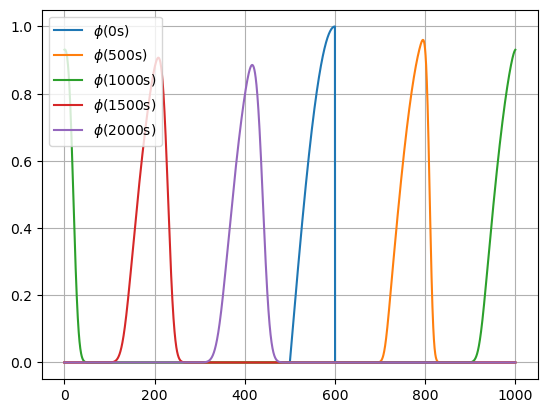

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def func(x): # define the initial shape (y value) of the function
    if x < 500. or x > 600.: 
        return 0.
    else:
        return -np.cos(np.pi*(x-400.)/200.)

# scheme: return new shape (y value) at time t+1
def ftbs(y0):
    return (1-c)*y0 + c*np.roll(y0, +1) # roll (+1): backward data
def ftfs(y0):
    return (1+c)*y0 - c*np.roll(y0, -1) # roll (-1): forward data

# main loop: call the scheme, put in loop, plot
def advection(x0, y0):
    t = 0
    scheme = ftbs if u > 0 else ftfs
    while t < duration:
        if t%tinterval < dt:
            plt.plot(x0, y0, label="$\phi$("+str(int(np.floor(t)))+"s)")
        y0 = scheme(y0)
        t = t + dt
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()

# intial condition
u = 0.42; dx = 0.25; dt = 0.15 # dt max = 1*dx/u
c = u*dt/dx

# testing zone
# dt = 0.59
# c = u*dt/dx
# print(c)
# print(1*dx/u)

tinterval = 500; duration = 2000+10
x0 = np.arange(0, 1000+dx, dx)
y0 = np.vectorize(func)(x0)

# run
advection(x0, y0)

The downstream scheme, forward in time, forward in space:
$$\phi_j^{n+1} = (1+c)\phi_j^n - c\phi_{j+1}^n$$
in which
$$c=u{{\Delta t}\over{\Delta x}}$$
if velocity is greater than 0, is uncoditionally unstable

For the upstream: 
use ftbs if velocity is greater than 0
use ftfs if velocity is less than 0

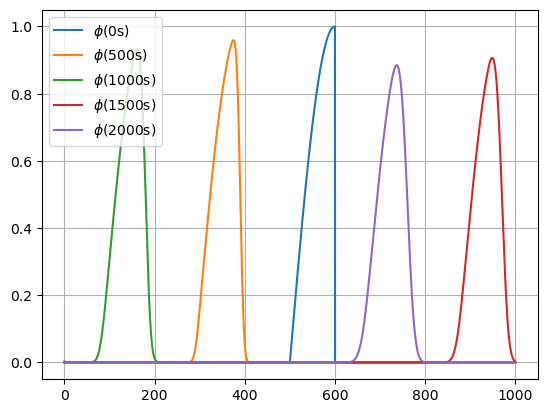

In [18]:
# Forward in time and foward in space
# unstable because velocity is greater than 0

u = -0.42 # intial condition
# dt = 0.59
c = u*dt/dx
# for velocity less than 0, the condition of c is the same. c > -1
# therefore, in conclusion, |c| < 1 with c = u*dt/dx

advection(x0, y0) 

If $\Delta t = \Delta x/u$ or $c = 1$, the FTBS scheme is stable and it does not show any damping or diffusion. The model exactly translates the initial shape in time. The weight in the formula:
$$\phi_j^{n+1} = (1-c)\phi_j^n + c\phi_{j-1}^n$$
are $0$ and $1$, i.e. no interpolation is performed and no error is present.


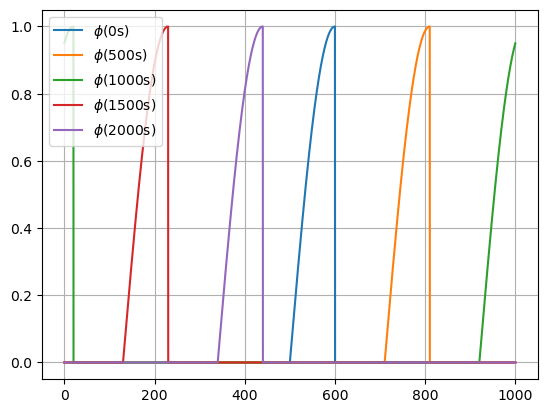

In [19]:
u = 0.42 # intial condition
dt = dx/u
c = u*dt/dx
advection(x0, y0) 